In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.plotting import scatter_matrix

df = pd.read_csv('Documents/smoking_drinking.csv')

print(df.head(10))
print(df.describe())
print(df.columns)
print(df.info)
print(df.dtypes)

      sex  age  height  weight  waistline  sight_left  sight_right  hear_left  \
0    Male   35     170      75       90.0         1.0          1.0          1   
1    Male   30     180      80       89.0         0.9          1.2          1   
2    Male   40     165      75       91.0         1.2          1.5          1   
3    Male   50     175      80       91.0         1.5          1.2          1   
4    Male   50     165      60       80.0         1.0          1.2          1   
5    Male   50     165      55       75.0         1.2          1.5          1   
6  Female   45     150      55       69.0         0.5          0.4          1   
7    Male   35     175      65       84.2         1.2          1.0          1   
8    Male   55     170      75       84.0         1.2          0.9          1   
9    Male   40     175      75       82.0         1.5          1.5          1   

   hear_right  SBP  ...  LDL_chole  triglyceride  hemoglobin  urine_protein  \
0           1  120  ...      

In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

#print(df.columns)

#Checking for missing values 
print(df.isnull().sum())
#Concluded no missing values

print(df['sex'].dtype)
print(df['DRK_YN'].dtype)

#Converting the data to numericals, to create better feasibility of analysis
df['DRK_YN'] = df['DRK_YN'].map({'Y': 1, 'N': 0, 'unknown': 0})
df['sex'] = df['sex'].map({'Male':1, 'Female':0})


sex                 0
age                 0
height              0
weight              0
waistline           0
sight_left          0
sight_right         0
hear_left           0
hear_right          0
SBP                 0
DBP                 0
BLDS                0
tot_chole           0
HDL_chole           0
LDL_chole           0
triglyceride        0
hemoglobin          0
urine_protein       0
serum_creatinine    0
SGOT_AST            0
SGOT_ALT            0
gamma_GTP           0
SMK_stat_type_cd    0
DRK_YN              0
dtype: int64
object
object


In [78]:
#Splitting train and test sets
X = df.drop('DRK_YN', axis = 1)
y = df['DRK_YN']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [81]:
clf = RandomForestClassifier(n_estimators = 100, random_state = 0)
clf.fit(X_train, y_train)

feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print(feature_scores)

y_pred = clf.predict(X_test)

print("New model accuracy score is: {0:0.4f}".format(accuracy_score(y_test, y_pred)))



gamma_GTP           0.076318
age                 0.068187
SMK_stat_type_cd    0.063370
hemoglobin          0.061546
HDL_chole           0.060763
triglyceride        0.056559
height              0.055638
LDL_chole           0.052560
tot_chole           0.051719
BLDS                0.050297
SGOT_ALT            0.049923
waistline           0.049213
SBP                 0.046196
SGOT_AST            0.043523
DBP                 0.043451
sex                 0.041054
sight_left          0.030431
serum_creatinine    0.030402
sight_right         0.030131
weight              0.029901
urine_protein       0.005040
hear_left           0.001929
hear_right          0.001848
dtype: float64
New model accuracy score is: 0.7335


In [82]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)


Accuracy:  0.7334947294093912


In [83]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)


In [84]:
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)

Accuracy:  0.7334947294093912
Precision:  0.7328667807874333
Recall:  0.7344790699551932


In [85]:
from sklearn.metrics import roc_auc_score

auc = np.round(roc_auc_score(y_test, y_pred),3)
print("AUC: ", auc)

AUC:  0.733


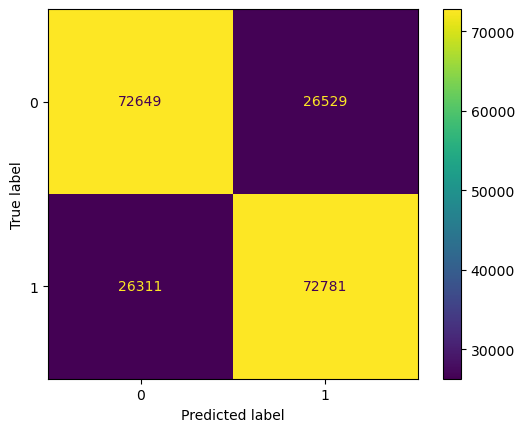

In [86]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix = cm).plot()
